In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
model=pickle.load(open("/content/drive/MyDrive/Fake news dataset/lstmmcd.pkl",'rb'))

In [ ]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Fake news dataset/Modified_train")
# Reverse the values in the 'label' column
df['label'] = 1 - df['label']
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,1
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,0
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,1
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,1
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,1
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",0


In [ ]:
df.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,1
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,0


In [ ]:
df.title.iloc[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
df.shape

(20800, 5)

In [ ]:
#Drop Nan values
df=df.dropna()

In [ ]:
#Get the independent features
x=df.drop('label',axis=1)

#Get the dependent features
y=df['label']

In [ ]:
x.shape,y.shape

((18285, 4), (18285,))

In [ ]:
messages=x.copy()
messages.reset_index(inplace=True)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
###Dataset  Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
  print(i)
  review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)



Streaming output truncated to the last 5000 lines.
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
1

In [ ]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [ ]:
voc_size=5000
onehot_repr=[one_hot(words,voc_size) for words in corpus]
onehot_repr

[[1222, 4906, 4685, 3709, 2544, 17, 2900, 231, 4491, 1005],
 [638, 4198, 2749, 2674, 4137, 959, 538],
 [3125, 2223, 1456, 289],
 [4197, 1692, 724, 2874, 3225, 1162],
 [1447, 4137, 1377, 409, 1445, 1561, 4137, 661, 193, 2519],
 [226,
  1003,
  1165,
  349,
  3522,
  2407,
  2562,
  4801,
  503,
  1669,
  1029,
  1783,
  3709,
  2617,
  538],
 [543, 301, 4492, 1999, 4841, 3346, 191, 690, 3187, 1089, 110],
 [1078, 4502, 3837, 2853, 92, 3567, 2407, 1298, 3187, 1089, 110],
 [3737, 1268, 4277, 1337, 2058, 4029, 2748, 2807, 2407, 442],
 [3312, 4151, 2084, 4737, 1975, 4294, 4739, 2083],
 [995, 2379, 575, 1970, 796, 3359, 242, 127, 2306, 4575, 810],
 [2874, 1568, 2544, 4029, 2407, 92],
 [1311, 1163, 2167, 1855, 1565, 979, 1617, 3767, 2636],
 [1584, 394, 648, 1105, 4374, 2396, 428, 3187, 1089, 110],
 [2617, 4281, 922, 975, 1396, 3187, 1089, 110],
 [2981, 2153, 3969, 4418, 81, 1391, 4114, 721, 839, 3640],
 [2605, 2475, 4198],
 [1019, 4889, 3184, 4106, 2407, 770, 3763, 538],
 [2123, 1844, 2749, 32

In [ ]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
embedded_docs

array([[   0,    0,    0, ...,  231, 4491, 1005],
       [   0,    0,    0, ..., 4137,  959,  538],
       [   0,    0,    0, ..., 2223, 1456,  289],
       ...,
       [   0,    0,    0, ..., 3187, 1089,  110],
       [   0,    0,    0, ...,   27,  360,   34],
       [   0,    0,    0, ..., 1307, 1794, 1517]], dtype=int32)

In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1222,
       4906, 4685, 3709, 2544,   17, 2900,  231, 4491, 1005], dtype=int32)

In [ ]:
x_test=embedded_docs.copy()

In [ ]:
# Number of Monte Carlo samples
n_samples = 100

# Perform Monte Carlo Dropout sampling on x_test
predictions = []
for _ in range(n_samples):
    preds = model.predict(x_test)  # Activate dropout layers during prediction
    predictions.append(preds)

# Calculate uncertainty as the standard deviation of predictions
predictions = np.array(predictions)
avg_prediction = np.mean(predictions, axis=0)
uncertainty = np.std(predictions, axis=0)


y_pred_classes=[]

# Iterate over each example in x_test and print results individually
for i in range(len(x_test)):
    example_avg_prediction = avg_prediction[i]
    example_uncertainty = uncertainty[i]

    if example_avg_prediction > 0.6:
        final_prediction = "Fake"
        y_pred_class=1
    else:
        final_prediction = "Real"
        y_pred_class=0

    y_pred_classes.append(y_pred_class)

    print(f"Example {i}:")
    print(f"Average Prediction: {example_avg_prediction}")
    print(f"Uncertainty: {example_uncertainty}")
    print(f"Final Prediction: {final_prediction}")
    print("-" * 40)

Streaming output truncated to the last 5000 lines.
Example 17285:
Average Prediction: [0.81278]
Uncertainty: [1.1920929e-07]
Final Prediction: Fake
----------------------------------------
Example 17286:
Average Prediction: [0.00154539]
Uncertainty: [1.1641532e-09]
Final Prediction: Real
----------------------------------------
Example 17287:
Average Prediction: [0.99994093]
Uncertainty: [7.748604e-07]
Final Prediction: Fake
----------------------------------------
Example 17288:
Average Prediction: [0.00021689]
Uncertainty: [5.820766e-11]
Final Prediction: Real
----------------------------------------
Example 17289:
Average Prediction: [1.]
Uncertainty: [0.]
Final Prediction: Fake
----------------------------------------
Example 17290:
Average Prediction: [0.99999756]
Uncertainty: [1.013279e-06]
Final Prediction: Fake
----------------------------------------
Example 17291:
Average Prediction: [0.9999239]
Uncertainty: [5.364418e-07]
Final Prediction: Fake
------------------------------

Confusion Matrix:
 [[2912 5012]
 [3136 7225]]
Accuracy: 0.5543888433141919
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.37      0.42      7924
           1       0.59      0.70      0.64     10361

    accuracy                           0.55     18285
   macro avg       0.54      0.53      0.53     18285
weighted avg       0.54      0.55      0.54     18285



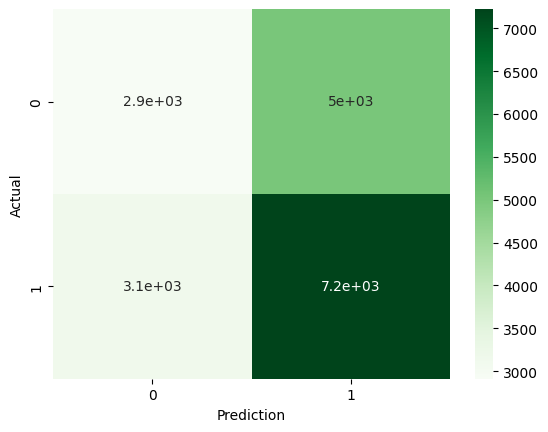

In [ ]:
#Confusion matrix, accuracy and classification report
y_test=y.copy()
confusion_mat = confusion_matrix(y_test,y_pred_classes)
accuracy = accuracy_score(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_mat,cmap="Greens",annot=True, xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()